In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import du dataset

In [18]:
df = pd.read_csv("/home/dany_tsan/code/Dany-Santi-TSAN/Scoring_impact_carbone/raw_data/Carbon_Emission.csv")
pd.set_option('display.max_columns', None)

## Vue d'ensemble de notre dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body_Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How_Often_Shower               10000 non-null  object
 4   Heating_Energy_Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle_Type                   3279 non-null   object
 7   Social_Activity                10000 non-null  object
 8   Monthly_Grocery_Bill           10000 non-null  int64 
 9   Frequency_of_Traveling_by_Air  10000 non-null  object
 10  Vehicle_Monthly_Distance_Km    10000 non-null  int64 
 11  Waste_Bag_Size                 10000 non-null  object
 12  Waste_Bag_Weekly_Count         10000 non-null  int64 
 13  Ho

In [21]:
df.describe()

,Monthly_Grocery_Bill,Vehicle_Monthly_Distance_Km,Waste_Bag_Weekly_Count,How_Long_TV_PC_Daily_Hour,How_Many_New_Clothes_Monthly,How_Long_Internet_Daily_Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


## Préparation de notre dataset 

In [19]:
#rename
# rename columns: replace spaces with underscores
df.columns = df.columns.str.replace(' ', '_')
# data.columns = data.columns.str.replace(' ', '_').str.lower()
# Rename 'public' to 'public transport' and the car-typs - to make the information easier to understand
df['Vehicle_Type'] = df['Vehicle_Type'].replace({'public': 'public transport', 'petrol': 'car (type: petrol)','diesel': 'car (type: diesel)',
                                                'hybrid': 'car (type: hybrid)','lpg': 'car (type: lpg)','electric': 'car (type: electric)'})
df['Transport'] = df['Transport'].replace({'public': 'public transport', 'private': 'car'})


df.head()

,Body_Type,Sex,Diet,How_Often_Shower,Heating_Energy_Source,Transport,Vehicle_Type,Social_Activity,Monthly_Grocery_Bill,Frequency_of_Traveling_by_Air,Vehicle_Monthly_Distance_Km,Waste_Bag_Size,Waste_Bag_Weekly_Count,How_Long_TV_PC_Daily_Hour,How_Many_New_Clothes_Monthly,How_Long_Internet_Daily_Hour,Energy_efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public transport,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,car,car (type: petrol),never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,car,car (type: diesel),often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [3]:
dict_variables_ordinal_categorical = {
    'Body_Type': ['underweight', 'normal', 'overweight', 'obese'],
    'Diet': ['vegan','vegetarian','pescatarian','omnivore'],
    'How_Often_Shower': ['less frequently','daily', 'twice a day','more frequently'],
    'Social_Activity': ['never', 'sometimes','often'],
    'Frequency_of_Traveling_by_Air': ['never', 'rarely', 'frequently', 'very frequently'],
    'Waste_Bag_Size': ['small','medium', 'large', 'extra large'],
    'Energy_efficiency': ['Yes', 'Sometimes', 'No']
}

for column, col_ordering in dict_variables_ordinal_categorical.items():
    df[column] = pd.Categorical(df[column], categories=col_ordering, ordered=True)

df['Waste_Bag_Size'].unique()

['large', 'extra large', 'small', 'medium']
Categories (4, object): ['small' < 'medium' < 'large' < 'extra large']

In [4]:
##create new column "Transport Vehicle Type"
df["Transport_Vehicle_Type"]=df["Vehicle_Type"] #create a new column
df.loc[df["Transport_Vehicle_Type"].isna(), "Transport_Vehicle_Type"] = df["Transport"]

df[["Transport","Vehicle_Type","Transport_Vehicle_Type"]].head()

,Transport,Vehicle_Type,Transport_Vehicle_Type
0,public transport,NaN,public transport
1,walk/bicycle,NaN,walk/bicycle
2,car,car (type: petrol),car (type: petrol)
3,walk/bicycle,NaN,walk/bicycle
4,car,car (type: diesel),car (type: diesel)


## Colonnes qui seront à utiliser dans le formulaire
* Body_Type = obese, overweight, underweight, normal
* Sex = female, male
* Diet = vegan, vegetarian, pescatarian, omnivore
* How_Often_Shower = less frequently, daily, twice a day, more frequently
* Heating_Energy_Source = coal, natural gas, wood, electricity
* Social_Activity = never, sometimes, often
* Monthly_Grocery_Bill = Number of grocery bill
* Frequency_of_Traveling_by_Air = never, rarely, frequently, very frequently
* Vehicle_Monthly_Distance_Km = Number of kilometers
* Waste_Bag_Size = small, medium, large, extra large
* Waste_Bag_Weekly_Count = Number of Count
* How_Long_TV_PC_Daily_Hour = Number of Hour
* How_Many_New_Clothes_Monthly = Number of New Clothes
* How_Long_Internet_Daily_Hour = Number of Daily Hour
* Energy_efficiency = Yes, Sometimes, No
* Recycling = Paper, Plastic,Glass, Metal
* Cooking_With = Stove, Oven, Microwave, Grill, Airfryer
* Transport_Vehicle_Type = Combinaison de Transport(public transport, walk/bicycle, car) & Vehicule Type(car (type: petrol), car (type: diesel), car (type: hybrid), car (type: lpg), car (type: electric))

In [5]:
df.head()

,Body_Type,Sex,Diet,How_Often_Shower,Heating_Energy_Source,Transport,Vehicle_Type,Social_Activity,Monthly_Grocery_Bill,Frequency_of_Traveling_by_Air,Vehicle_Monthly_Distance_Km,Waste_Bag_Size,Waste_Bag_Weekly_Count,How_Long_TV_PC_Daily_Hour,How_Many_New_Clothes_Monthly,How_Long_Internet_Daily_Hour,Energy_efficiency,Recycling,Cooking_With,CarbonEmission,Transport_Vehicle_Type
0,overweight,female,pescatarian,daily,coal,public transport,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238,public transport
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892,walk/bicycle
2,overweight,male,omnivore,more frequently,wood,car,car (type: petrol),never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595,car (type: petrol)
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074,walk/bicycle
4,obese,female,vegetarian,daily,coal,car,car (type: diesel),often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743,car (type: diesel)


## Visualisation des données

### Les corrélations

### 0) la relation globale et le Carbon Emission

In [11]:
X = df.drop('CarbonEmission', axis=1)
y = df['CarbonEmission']

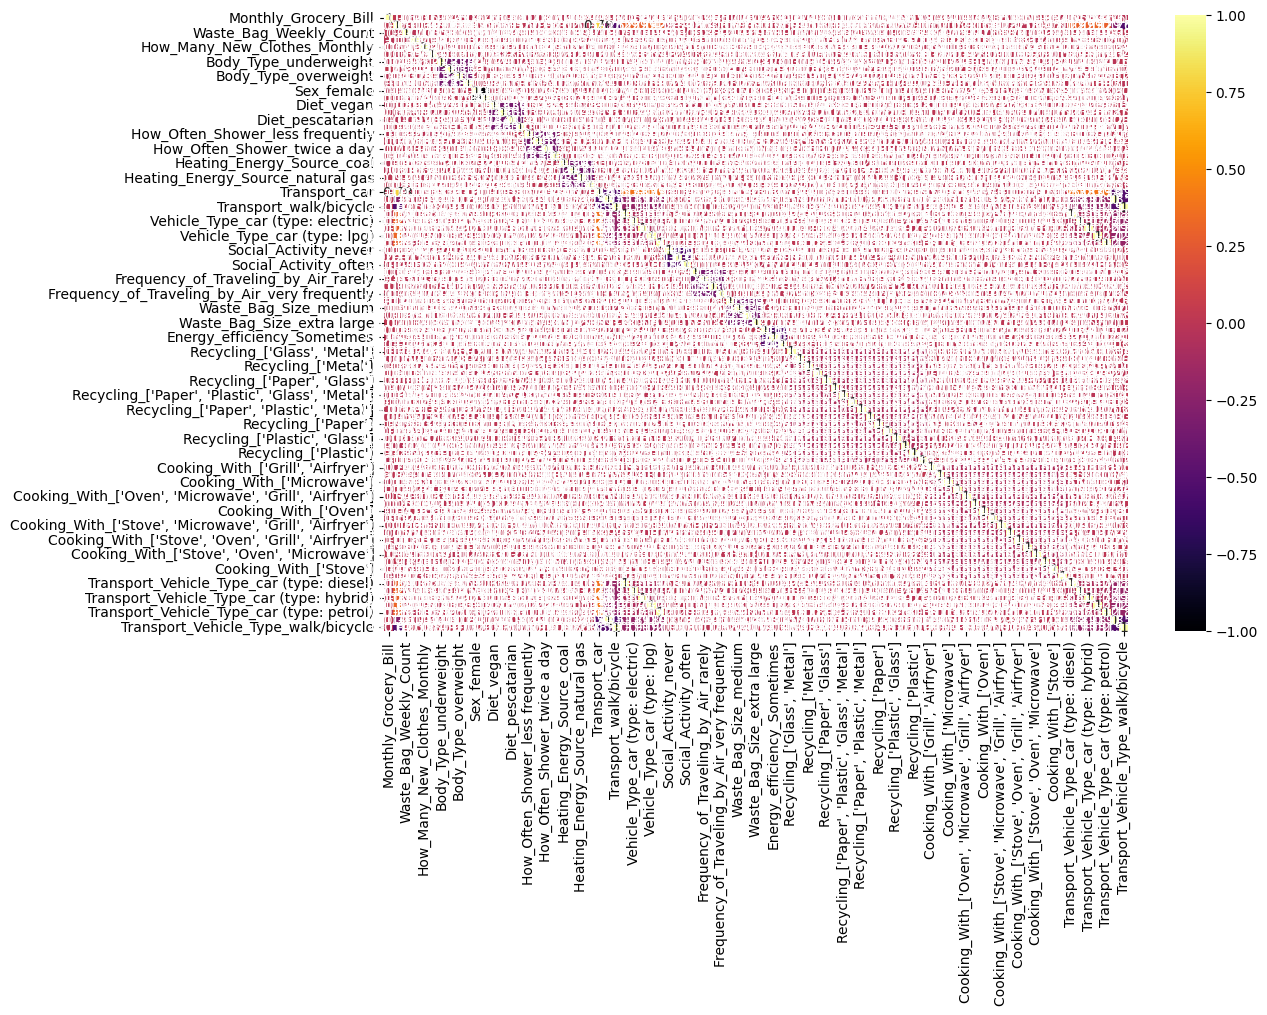

In [17]:
# Convert categorical variables into dummy/indicator variables
X_corr = pd.get_dummies(X)

# Calculate the correlation matrix
corr = X_corr.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='inferno')

# Show the plot
plt.show()

Il est impossible de visualiser l'ensemble des features avec notre cible 'Carbon Emission'. 

On va investiguer sur les différentes corrélations de notre dataset par type

### 1) la relation entre le transport et le Carbon Emission

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

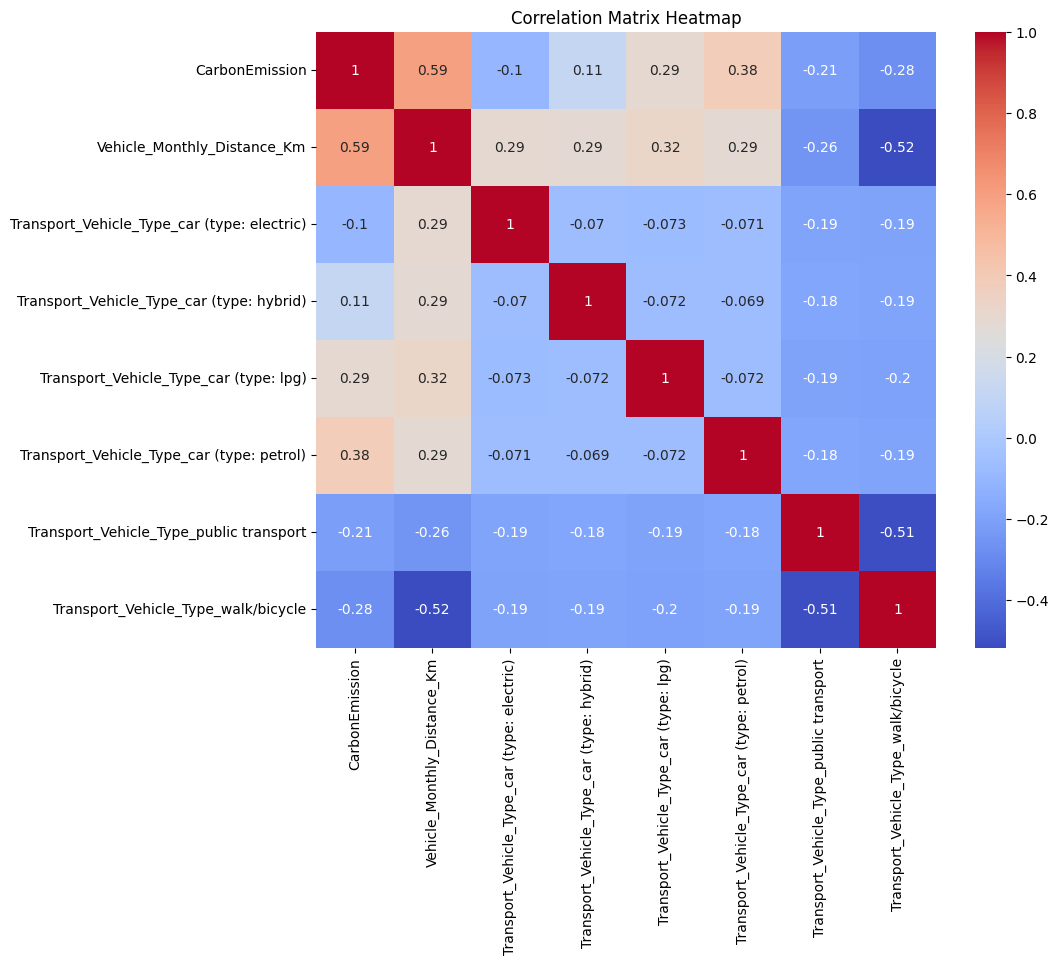

In [7]:
df_corr_transport = df[["CarbonEmission","Vehicle_Monthly_Distance_Km","Transport_Vehicle_Type"]].copy()

# Create dummy variables for Transport_Vehicle_Type
df_corr_transport = pd.get_dummies(df_corr_transport, columns=["Transport_Vehicle_Type"], drop_first=True)

# Calculate the correlation matrix
correlation_matrix_transport = df_corr_transport.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_transport, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

### 2) la relation entre la life style et le Carbon Emission

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

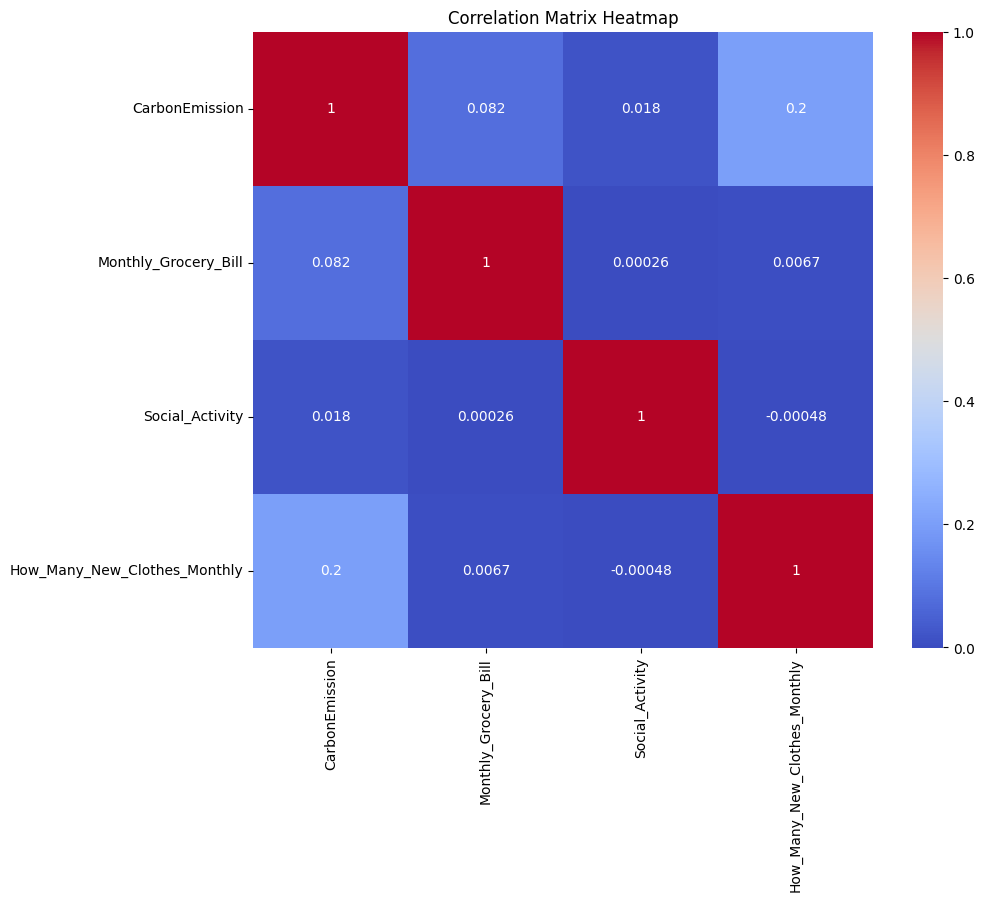

In [8]:
df_corr_life_style = df[["CarbonEmission","Monthly_Grocery_Bill", "Social_Activity", "How_Many_New_Clothes_Monthly"]].copy()

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit the label encoder to the Social_Activity column and transform it
df_corr_life_style['Social_Activity'] = le.fit_transform(df_corr_life_style['Social_Activity'])

# Calculate the correlation matrix
correlation_matrix_life_style = df_corr_life_style.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_life_style, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

### 3) la relation entre le déplacement en avion et le Carbon Emission

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

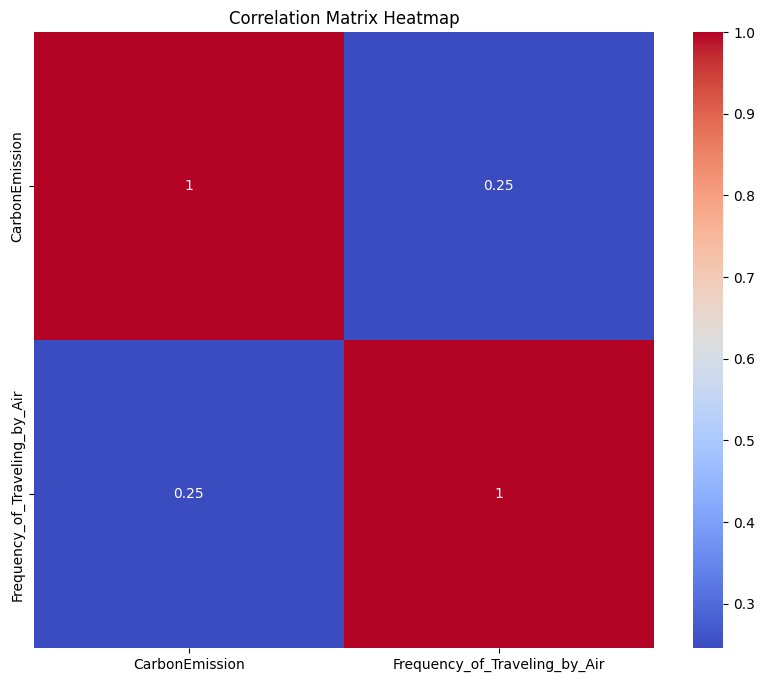

In [9]:
df_corr_travel = df[["CarbonEmission","Frequency_of_Traveling_by_Air"]].copy()

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit the label encoder to the Social_Activity column and transform it
df_corr_travel['Frequency_of_Traveling_by_Air'] = le.fit_transform(df_corr_travel['Frequency_of_Traveling_by_Air'])

# Calculate the correlation matrix
correlation_matrix_travel = df_corr_travel.corr()

# heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_travel, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

#### Répartition de l'empreinte carbone en fonction du mode de transport

INTERPRÉTATION: Ce graphique montre comment le choix du transport
(marche, vélo, voiture privée, transports publics) influence l'empreinte carbone.
Par exemple, on pourrait voir que les véhicules privés avec des carburants fossiles ont une empreinte carbone 
plus élevée par rapport à ceux qui privilégient la marche ou le vélo

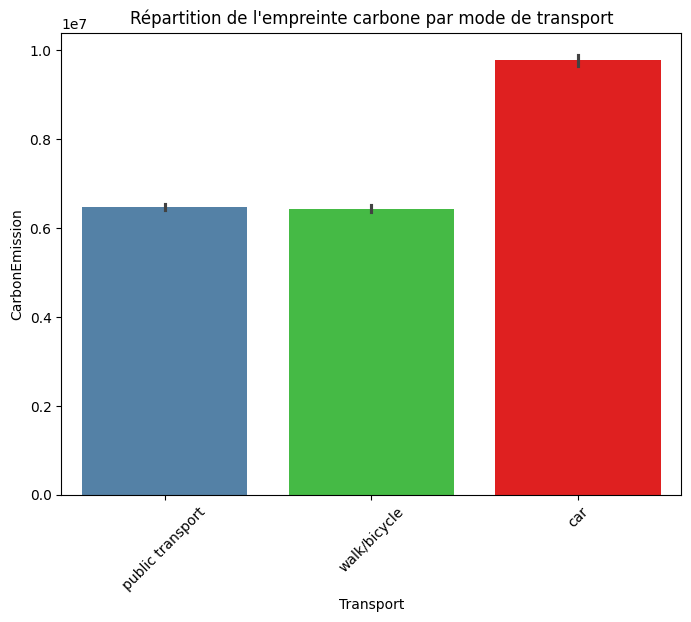

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x='Transport', y='CarbonEmission', hue='Transport', data=df, estimator=sum, palette=['#4682B4','#32CD32', '#FF0000'], legend=False)
plt.title('Répartition de l\'empreinte carbone par mode de transport')
plt.xticks(rotation=45);

#### Relation entre la source d'énergie de chauffage et les émissions de carbone

INTERPRETATION : Ce graphique illustre l'impact de différentes sources d'énergie pour le chauffage résidentiel (électricité, gaz, charbon, etc.)
sur les émissions de carbone. L'objectif serait d'observer comment chaque source contribue aux émissions globales

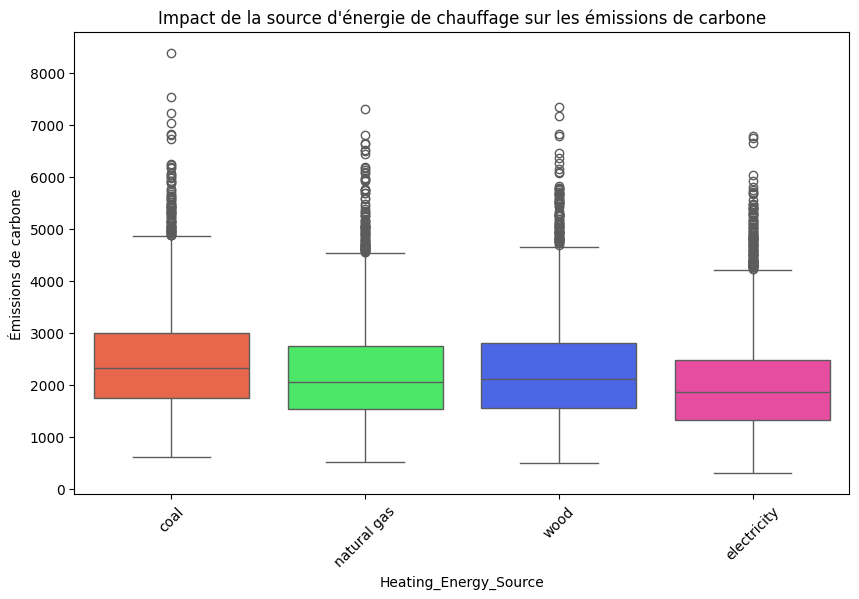

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Heating_Energy_Source', y='CarbonEmission', hue='Heating_Energy_Source', data=df, palette=['#FF5733', '#33FF57', '#3357FF', '#FF33A1'], legend=False)
plt.title('Impact de la source d\'énergie de chauffage sur les émissions de carbone')
plt.ylabel('Émissions de carbone')
plt.xticks(rotation=45);

#### Relation entre les régimes alimentaires et les émissions de carbone

INTERPRETATION : Ce graphique comparerait l'empreinte carbone en fonction du régime alimentaire (omnivore, végétarien, vegan, etc.).
Il pourrait mettre en évidence que les régimes végétariens et végans ont généralement une empreinte plus faible que les régimes omnivores

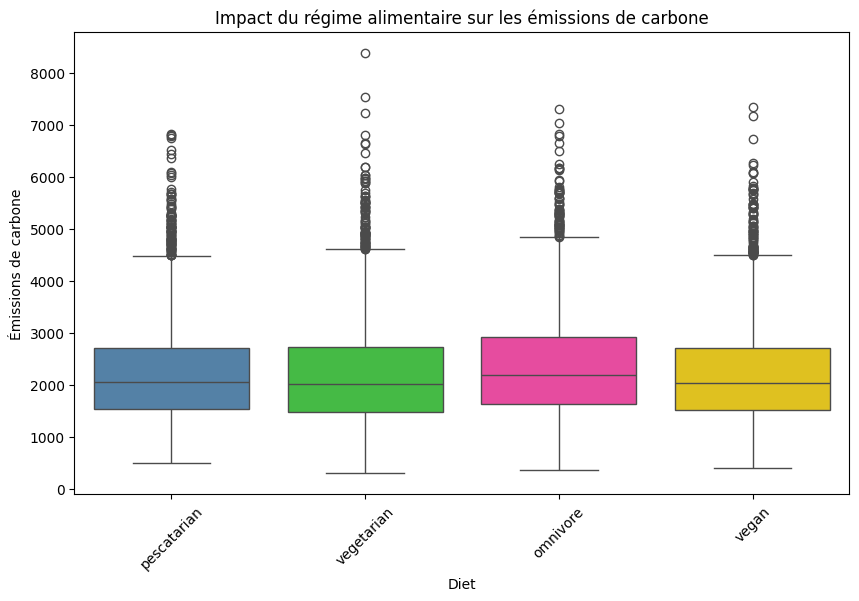

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Diet', y='CarbonEmission', hue='Diet', data=df, palette=['#4682B4', '#32CD32', '#FF33A1', '#FFD700'], legend=False)
plt.title('Impact du régime alimentaire sur les émissions de carbone')
plt.ylabel('Émissions de carbone')
plt.xticks(rotation=45);

#### Relation entre la fréquence de vol et les émissions de carbone

INTERPRETATION :les graphiques montrent que la fréquence des voyages en avion a un impact sur les émissions de carbone, avec une augmentation des émissions à mesure que la fréquence des voyages augmente. 
En conclusion, les voyages en avion contribuent aux émissions de carbone et que la fréquence des voyages a un impact significatif sur ces émissions

C:\Users\tsand\AppData\Local\Temp\ipykernel_30564\349550153.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency_of_Traveling_by_Air', y='CarbonEmission', data=df, estimator=sum, ax=axs[0], palette='inferno')


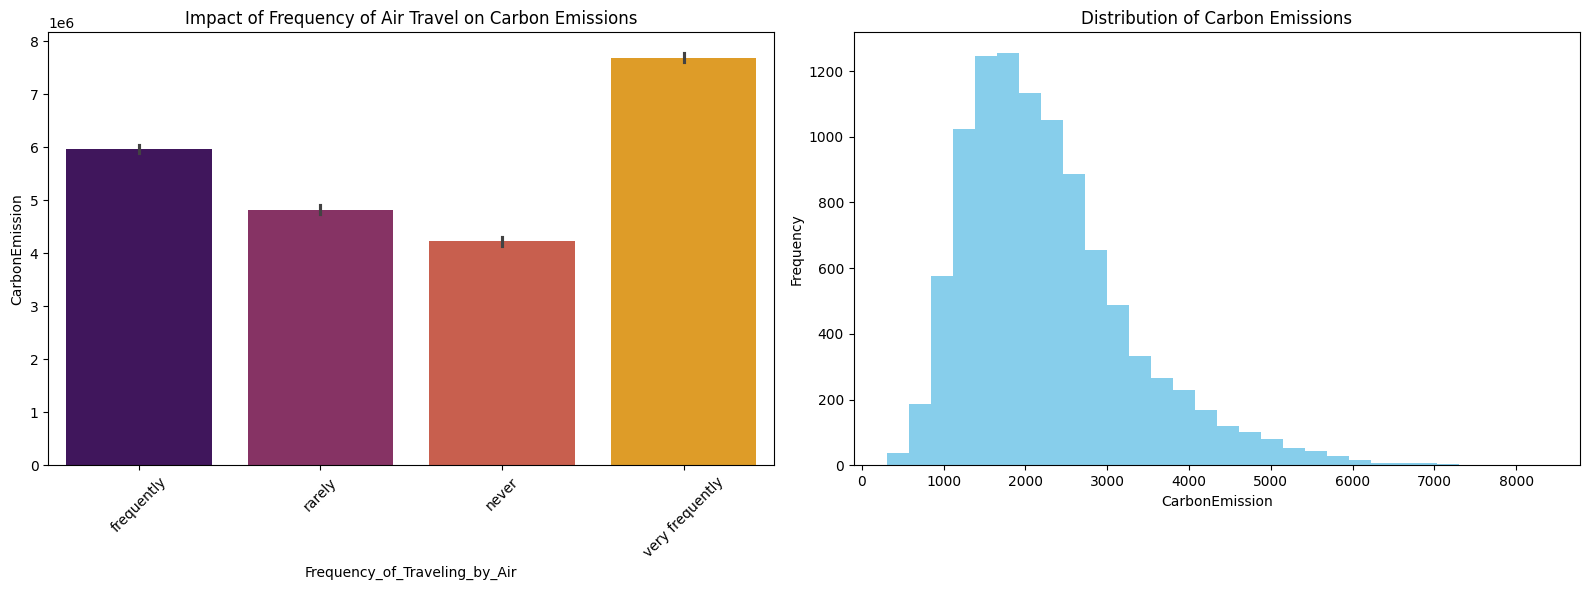

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x='Frequency_of_Traveling_by_Air', y='CarbonEmission', data=df, estimator=sum, ax=axs[0], palette='inferno')
axs[0].set_title('Impact of Frequency of Air Travel on Carbon Emissions')
axs[0].set_ylabel('CarbonEmission')
axs[0].set_xticks(axs[0].get_xticks())
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)

axs[1].hist(df['CarbonEmission'], bins=30, color='skyblue')
axs[1].set_title('Distribution of Carbon Emissions')
axs[1].set_xlabel('CarbonEmission')
axs[1].set_ylabel('Frequency')

fig.tight_layout();

#### Graphique de type scatterplot illustrant l'impact des achats mensuels sur l'empreinte carbone

INTERPRETATION: Le graphique montre qu'il n'ya pas de relation forte entre la facture mensuelle des courses et l'emisison carbone. ce qui montre qu'il n'ya pas d'impact significatif. 

C:\Users\tsand\AppData\Local\Temp\ipykernel_30564\2012197643.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Monthly_Grocery_Bill', y='CarbonEmission', data=df, palette='viridis')


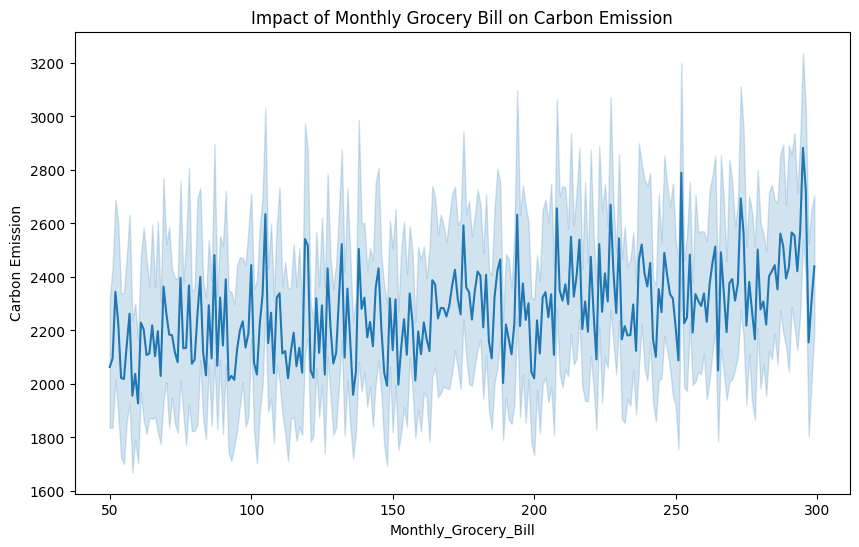

In [42]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Monthly_Grocery_Bill', y='CarbonEmission', data=df, palette='viridis')
plt.title('Impact of Monthly Grocery Bill on Carbon Emission')
plt.ylabel('Carbon Emission')
plt.show()

#### Boxplot pour visualiser les émissions de carbone par type de corps

INTERPRETATION: Bien qu'il semble y avoir une tendance à des émissions plus élevées chez les personnes obèses et en surpoids, la grande variabilité et le chevauchement entre les catégories suggèrent que d'autres facteurs jouent également un rôle important dans les émissions de carbone individuelles

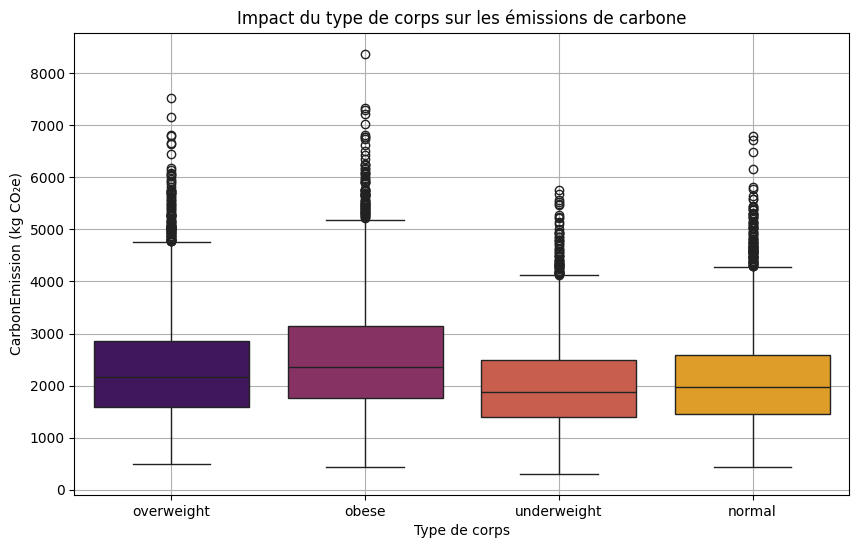

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Body_Type', y='CarbonEmission', hue='Body_Type', data=df, palette='inferno', legend=False)
plt.title('Impact du type de corps sur les émissions de carbone')
plt.xlabel('Type de corps')
plt.ylabel('CarbonEmission (kg CO₂e)')
plt.grid(True);

#### Boxplot montrant la distribution des émissions de carbone pour différentes fréquences de douche

INTERPRETATION: Le graphique montre que la médiane des émissions de carbone pour les douches deux fois par jour est légèrement plus élevée que la médiane des émissions de carbone pour les douches quotidiennes par exemple. Cela montre que se doucher deux fois par jour peut contribuer à des émissions de carbone plus élevées que de se doucher quotidiennement. Cependant, la différence n'est pas grande car les 4 boxplots se chevauchent. Cela indique qu'il y a de la variabilité dans les émissions de carbone au sein de chaque catégorie, et que les émissions de carbone individuelles ne peuvent pas être déterminées uniquement par la fréquence des douches

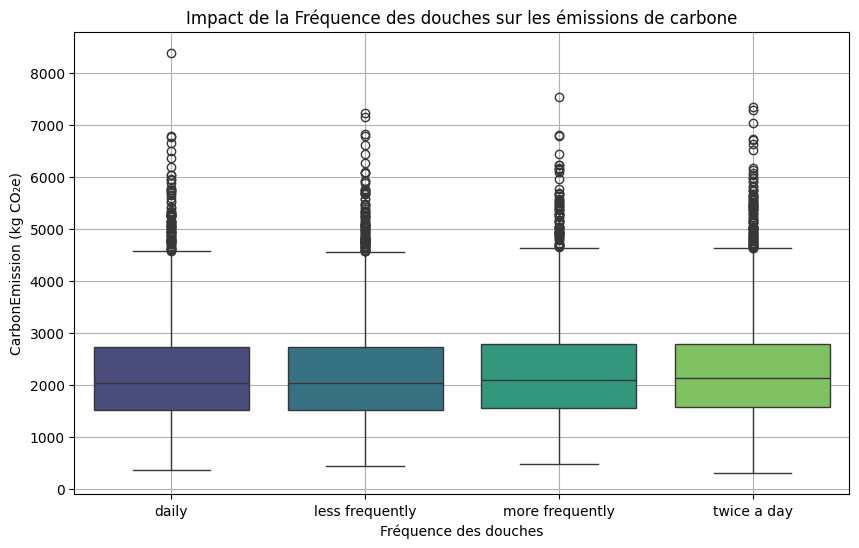

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='How_Often_Shower', y='CarbonEmission', hue='How_Often_Shower', data=df, palette='viridis', legend=False)
plt.title('Impact de la Fréquence des douches sur les émissions de carbone')
plt.xlabel('Fréquence des douches')
plt.ylabel('CarbonEmission (kg CO₂e)')
plt.grid(True);

#### Scatter plot pour visualiser la relation entre le temps passé devant la TV/PC et les émissions de carbone

INTERPRETATION: Le graphique montre qu'il n'y a pas de relation claire entre le temps passé devant la télévision/PC par jour et les émissions de carbone. Les points sont dispersés aléatoirement sur le graphique, sans tendance ou corrélation discernable. Cela suggère que le temps passé devant la télévision/PC par jour peut ne pas avoir d'impact significatif sur les émissions de carbone. 


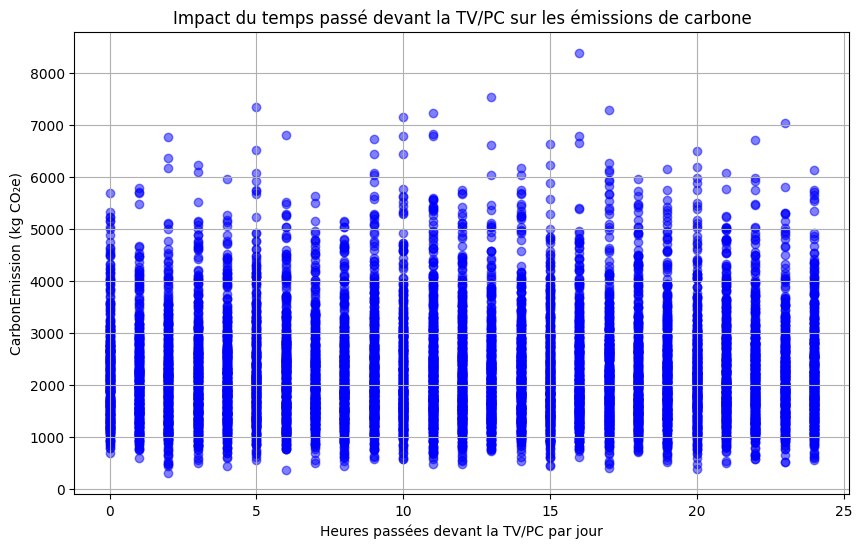

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(df['How_Long_TV_PC_Daily_Hour'], df['CarbonEmission'], alpha=0.5, color='blue')
plt.title('Impact du temps passé devant la TV/PC sur les émissions de carbone')
plt.xlabel('Heures passées devant la TV/PC par jour')
plt.ylabel('CarbonEmission (kg CO₂e)')
plt.grid(True);

#### Box plot comparant les distributions des émissions de carbone entre les genres

INTERPRETATION: Le graphique montre que la médiane des émissions de carbone pour les hommes est plus élevée que la médiane des émissions de carbone pour les femmes. Cela montre que les hommes peuvent contribuer à des émissions de carbone plus élevées que les femmes. Cependant, la différence n'est pas grande, et les boxplots pour les deux genres se chevauchent dans une certaine mesure. Cela indique qu'il y a de la variabilité dans les émissions de carbone au sein de chaque genre, et que les émissions de carbone individuelles ne peuvent pas être déterminées uniquement par le genre

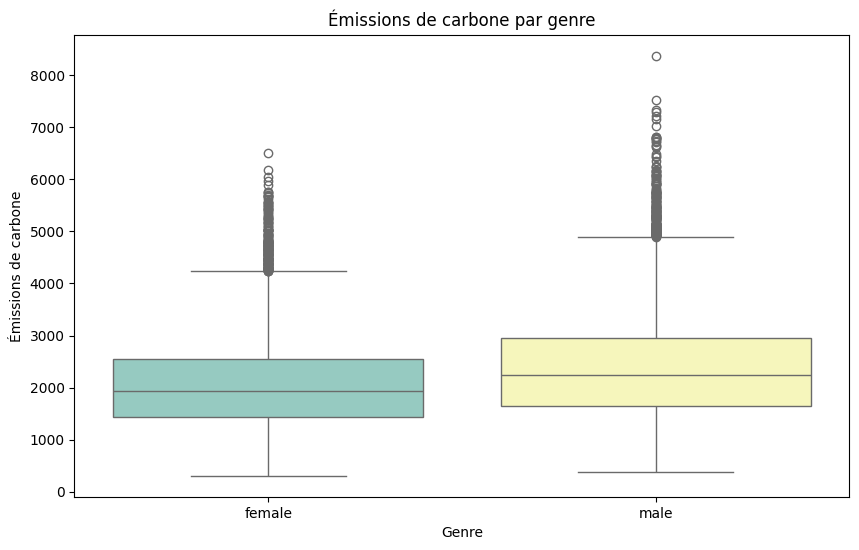

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='CarbonEmission', hue='Sex', data=df, palette="Set3", legend=False)
plt.title('Émissions de carbone par genre')
plt.xlabel('Genre')
plt.ylabel('Émissions de carbone');

#### Conclusion: 

En se basant sur ces observations, il peut être conclu que la fréquence des voyages en avion, le régime alimentaire, le mode de transport et la source d'énergie utilisée pour le chauffage sont tous des facteurs qui contribuent aux émissions de carbone. Pour réduire les émissions de carbone, les individus pourraient envisager de réduire leur fréquence de voyage en avion, d'adopter un régime alimentaire plus axé sur les plantes, d'utiliser des modes de transport plus économes en énergie et d'utiliser des sources d'énergie renouvelables pour le chauffage